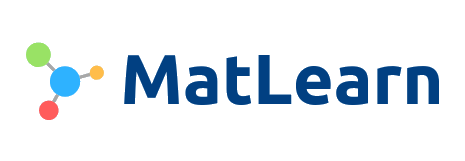

# Data Preprocessing

Data Preprocessing, merupakan suatu kegiatan membersihkan, menyeleksi dan mentransformasi suatu data sehingga data tersebut dapat kita gunakan untuk melatih machine learning.

Contoh:

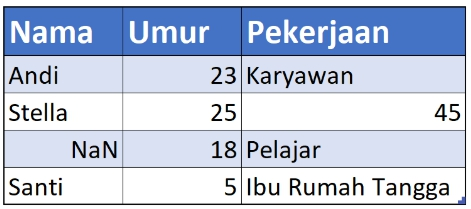

Pada contoh **Data Daftar Peserta pengajuan Surat Ijin Mengemudi di atas**, terdapat beberapa kesalahan/error data seperti berikut :
- Pada kolom **Nama** terdapat nilai NaN value atau data yang kosong
- Pada kolom **Umur** terdapat nilai 5 tahun yang dimana kita tahu bahwa batas minimum umur untuk pengajuan SIM adalah 17 tahun
- Pada kolom **Pekerjaan** terdapat nilai 45 yang tidak sesuai dengan konteks kolomnya

Maka dari itu kita butuh data preprocessing untuk mengoreksi data tersebut

## Handle Missing Value

Missing value adalah data yang kosong, kita akan gunakan data Titanic sebagai contoh data yang akan kita lakukan eksplorasi dan lihat missing valuenya seperti apa.

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('data/train.csv', sep=';')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Kita bisa lihat pada data tersebut ada NaN value. Untuk mengecek jumlahnya kita bisa menggunakan beberapa cara

- df.info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


dari data tersebut kita tahu bahwa seharusnya ada 891 baris, dan seharusnya ada 891 baris yang non-null. Tetapi jika kita lihat **Age** hanya 714 non-null artinya ada data yang null atau NaN, begitu juga untuk **Cabin** dan **Embarked**. Pertanyaannya adalah bagaimana jika kita ingin melihat jumlah null nya?

- pd.isnull(df).sum()

In [6]:
pd.isnull(df)

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
5          False     False   False  False  False   True  False  False   False   
6          False     False   False  False  False  False  False  False   False   
7          False     False   False  False  False  False  False  False   False   
8          False     False   False  False  False  False  False  False   False   
9          False     False   False  False  False  False  False  False   False   
10         False     False   False  False  False  False  False  False   False   
11         False     False   False  False  False  False  False  False   False   
12         False     False   False  False  False  False  False  False   False   
13         False     False   False  False  False  False  False  False   False   
14         False     False   False  False  False  False  False  False   False   
15         False     False   False  False  False  False  False  False   False   
16         False     False   False  False  False  False  False  False   False   
17         False     False   False  False  False   True  False  False   False   
18         False     False   False  False  False  False  False  False   False   
19         False     False   False  False  False   True  False  False   False   
20         False     False   False  False  False  False  False  False   False   
21         False     False   False  False  False  False  False  False   False   
22         False     False   False  False  False  False  False  False   False   
23         False     False   False  False  False  False  False  False   False   
24         False     False   False  False  False  False  False  False   False   
25         False     False   False  False  False  False  False  False   False   
26         False     False   False  False  False   True  False  False   False   
27         False     False   False  False  False  False  False  False   False   
28         False     False   False  False  False   True  False  False   False   
29         False     False   False  False  False   True  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
861        False     False   False  False  False  False  False  False   False   
862        False     False   False  False  False  False  False  False   False   
863        False     False   False  False  False   True  False  False   False   
864        False     False   False  False  False  False  False  False   False   
865        False     False   False  False  False  False  False  False   False   
866        False     False   False  False  False  False  False  False   False   
867        False     False   False  False  False  False  False  False   False   
868        False     False   False  False  False   True  False  False   False   
869        False     False   False  False  False  False  False  False   False   
870        False     False   False  False  False  False  False  False   False   
871        False     False   False  False  False  False  False  False   False   
872        False     False   False  False  False  False  False  False   False   
873        False     False   False  False  False  False  False  False   False   
874        False     False   False  False  False  False  False  False   False   
875        False     False   False  False  False  False  False  False   False   
876        False     False   False  False  False  False  False  False   False   
877        False     False   False  False  False  False  False  False   False   
878        False     False   False  

pada data di atas bagian True adalah NaN atau missing value

In [7]:
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

nah, data di atas baru menunjukkan jumlah missing value tiap kolom, seperti kebalikan dari df.info()

### Dropna Function

fungsi dropna adalah fungsi yang berguna untuk menghapus baris data yang memiliki missing value. Agar lebih aman kita akan mengopy data df terlebih dahulu kedalam variabel baru

In [8]:
df_1 = df.copy()
df_1.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [9]:
df_1 = df_1.dropna()
df_1.head()

PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
10      1   PP 9549  16.7000    G6        S  
11      0    113783  26.5500  C103        S

dapat kita lihat indexnya ada beberapa yang hilang, artinya datanya sudah terhapus. coba kita bandingkan shape nya

In [10]:
df.shape

(891, 12)

In [11]:
df_1.shape

(183, 12)

dapat kita lihat dari 891 baris menjadi 183 baris.

Bagaimana jika kita ingin menghapus kolom tertentu?

kita akan hapus kolom **Cabin** karena kolom tersebut memiliki jumlah missing value paling banyak

In [12]:
df_1.drop(['Cabin'], axis=1)

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
21            22         1       2   
23            24         1       1   
27            28         0       1   
52            53         1       1   
54            55         0       1   
62            63         0       1   
66            67         1       2   
75            76         0       3   
88            89         1       1   
92            93         0       1   
96            97         0       1   
97            98         1       1   
102          103         0       1   
110          111         0       1   
118          119         0       1   
123          124         1       2   
124          125         0       1   
136          137         1       1   
137          138         0       1   
139          140         0       1   
148          149         0       2   
151          152         1       1   
170          171         0       1   
174          175         0       1   
177          178         0       1   
..           ...       ...     ...   
737          738         1       1   
741          742         0       1   
742          743         1       1   
745          746         0       1   
748          749         0       1   
751          752         1       3   
759          760         1       1   
763          764         1       1   
765          766         1       1   
772          773         0       2   
779          780         1       1   
781          782         1       1   
782          783         0       1   
789          790         0       1   
796          797         1       1   
802          803         1       1   
806          807         0       1   
809          810         1       1   
820          821         1       1   
823          824         1       3   
835          836         1       1   
853          854         1       1   
857          858         1       1   
862          863         1       1   
867          868         0       1   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
21                               Beesley, Mr. Lawrence    male  34.0      0   
23                        Sloper, Mr. William Thompson    male  28.0      0   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
54                      Ostby, Mr. Engelhart Cornelius    male  65.0      0   
62                         Harris, Mr. Henry Birkhardt    male  45.0      1   
66                        Nye, Mrs. (Elizabeth Ramell)  female  29.0      0   
75                             Moen, Mr. Sigurd Hansen    male  25.0      0   
88                          Fortune, Miss. Mabel Helen  female  23.0      3   
92                         Chaffee, Mr. Herbert Fuller    male  46.0      1   
96                           Goldschmidt, Mr. George B    male  71.0      0   
97                     Greenfield, Mr. William Bertram    male  23.0      0   
102                          White, Mr. Richard Frasar    male  21.0      0   
110                     Porter, Mr. Walter Chamberlain    male  47.0      0   
118                           Baxter, Mr. Quigg Edmond    male  24.0

Bagaimana jika ingin menghapus 2 kolom?

In [13]:
df_1.drop(['Cabin', 'Name'], axis=1)

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch       Ticket  \
1              2         1       1  female  38.0      1      0     PC 17599   
3              4         1       1  female  35.0      1      0       113803   
6              7         0       1    male  54.0      0      0        17463   
10            11         1       3  female   4.0      1      1      PP 9549   
11            12         1       1  female  58.0      0      0       113783   
21            22         1       2    male  34.0      0      0       248698   
23            24         1       1    male  28.0      0      0       113788   
27            28         0       1    male  19.0      3      2        19950   
52            53         1       1  female  49.0      1      0     PC 17572   
54            55         0       1    male  65.0      0      1       113509   
62            63         0       1    male  45.0      1      0        36973   
66            67         1       2  female  29.0      0      0   C.A. 29395   
75            76         0       3    male  25.0      0      0       348123   
88            89         1       1  female  23.0      3      2        19950   
92            93         0       1    male  46.0      1      0  W.E.P. 5734   
96            97         0       1    male  71.0      0      0     PC 17754   
97            98         1       1    male  23.0      0      1     PC 17759   
102          103         0       1    male  21.0      0      1        35281   
110          111         0       1    male  47.0      0      0       110465   
118          119         0       1    male  24.0      0      1     PC 17558   
123          124         1       2  female  32.5      0      0        27267   
124          125         0       1    male  54.0      0      1        35281   
136          137         1       1  female  19.0      0      2        11752   
137          138         0       1    male  37.0      1      0       113803   
139          140         0       1    male  24.0      0      0     PC 17593   
148          149         0       2    male  36.5      0      2       230080   
151          152         1       1  female  22.0      1      0       113776   
170          171         0       1    male  61.0      0      0       111240   
174          175         0       1    male  56.0      0      0        17764   
177          178         0       1  female  50.0      0      0     PC 17595   
..           ...       ...     ...     ...   ...    ...    ...          ...   
737          738         1       1    male  35.0      0      0     PC 17755   
741          742         0       1    male  36.0      1      0        19877   
742          743         1       1  female  21.0      2      2     PC 17608   
745          746         0       1    male  70.0      1      1    WE/P 5735   
748          749         0       1    male  19.0      1      0       113773   
751          752         1       3    male   6.0      0      1       392096   
759          760         1       1  female  33.0      0      0       110152   
763          764         1       1  female  36.0      1      2       113760   
765          766         1       1  female  51.0      1      0        13502   
772          773         0       2  female  57.0      0      0  S.O./P.P. 3   
779          780         1       1  female  43.0      0      1        24160   
781          782         1       1  female  17.0      1      0        17474   
782          783         0       1    male  29.0      0      0       113501   
789          790         0       1    male  46.0      0      0     PC 17593   
796          797         1       1  female  49.0      0      0        17465   
802          803         1       1    male  11.0      1      2       113760   
806          807         0       1    male  39.0      0      0       112050   
809          810         1       1  female  33.0      1      0       113806   
820          821         1       1  female  52.0      1

### Fillna Function

berbeda dengan dropna yang berfungsi untuk menghapus baris yang memiliki missing value, fillna berfungsi untuk mengisi missing value tersebut.

In [14]:
df1 = df.copy()
df1.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [15]:
df.shape

(891, 12)

pengisian missing value bisa berdasarkan 3 hal:
- mean
- median
- modus/mode

bagaimana cara kita menentukan apakah akan menggunakan mean, median, ataupun modus? coba kita lihat statistiknya dulu

In [16]:
df1.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

coba kita lihat kolom **Age** ada beberapa data kosong karena hanya memiliki 714 data dari 891 data. Untuk **Age** tidak mungkin kita gunakan modus, karena modus digunakan untuk data kategorikal sedangkan **Age** adalah numerikal. Mean dan median sebenarnya bagus juga digunakan, namun **Age** menandakan umur sehingga akan lebih baik jika value yang kita ambil adalah bulat bukan desimal maka dari itu kita ambil mediannya.

Sebenarnya dalam menentukan mean atau median dapat dilihat dari persebaran datanya, namun jika kita tidak mengetahui persebaran datanya dapat pula dengan melihat sifat dari variabelnya.

In [17]:
df1 = df1.fillna({'Age':df1['Age'].median()})
df1

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male  28.0      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male  28.0      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female  28.0

sip sekarang missing value untuk **Age** sudah tidak ada, untuk memastikan kita bisa lihat info dari datanya

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Age** sekarang sudah terisi hingga 891 data. Contoh tersebut digunakan untuk mean dan median. Bagaimana untuk modus? coba kita lihat kolom **Embarked**. pertama kita cari tahu nilai modusnya

In [19]:
df1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

yaps, modusnya adalah S sekarang kita akan memasukan S kedalam missing value pada kolom **Embarked**

In [20]:
df1 = df1.fillna({'Embarked':'S'})
df1

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male  28.0      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male  28.0      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female  28.0

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Sekarang kolom **Embarked** sudah lengkap hingga 891 data. Lalu bagaimana dengan **Cabin** yang isinya hanya 204? **Cabin** dapat dihapus ataupun diisi, jika diisi pun juga terdapat konsekuensinya, coba kita lihat

In [22]:
df1['Cabin'].value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
F2                 3
D                  3
C22 C26            3
F33                3
E101               3
C2                 2
E44                2
C123               2
B57 B59 B63 B66    2
B20                2
C78                2
B22                2
C126               2
E24                2
D20                2
D35                2
B49                2
B18                2
F4                 2
B58 B60            2
C83                2
C125               2
E8                 2
C52                2
D26                2
C124               2
B77                2
                  ..
A16                1
A7                 1
F38                1
E46                1
E50                1
C111               1
E68                1
E34                1
C99                1
D15                1
C118               1
C91                1
C32                1
A32                1
D30                1
D45                1
C86          

data **Cabin** terlalu banyak, dan juga memiliki banyak value dengan jumlah terbanyak hal tersebutlah yang akan menjadi konsekuensi dalam pengisian value.

### Interpolation

Interpolasi merupakan mengisi nilai yang kosong dengan pola-pola tertentu biasa dengan data time series ( data yang berkaitan dengan waktu). Maka dari itu untuk mempelajari interpolasi kita akan menggunakan data lain karena interpolasi tidak cocok digunakan untuk data Titanics.

In [23]:
data1 = pd.read_csv('http://bit.do/machine_temperature')

In [24]:
data1.head()

Measurement date  Machine temperature
0          20161227                   46
1          20161228                   47
2          20161229                   48
3          20161230                   45
4          20161231                   47

kita gunakan data machine temperature. Data tersebut terdiri dari dua kolom, dimana kolom **Measurement date** menunjukkan tanggal dengan format tahun-bulan-tanggal, namun disitu bentuknya masih integer.

kita akan lihat ukuran sebenarnya data tersebut

In [25]:
data1.shape

(30, 2)

ada 30 data, sekarang kita lihat jumlah missing valuenya dengan isnull

In [26]:
pd.isnull(data1).sum()

Measurement date       0
Machine temperature    0
dtype: int64

ternyata tidak ditemukan missing value, tetapi coba kita lihat data keseluruhannya lebih teliti

In [27]:
data1

Measurement date  Machine temperature
0           20161227                   46
1           20161228                   47
2           20161229                   48
3           20161230                   45
4           20161231                   47
5           20170102                   54
6           20170103                   52
7           20170105                   47
8           20170106                   52
9           20170107                   48
10          20170108                   48
11          20170109                   47
12          20170110                   47
13          20170117                   52
14          20170119                   51
15          20170120                   50
16          20170121                   47
17          20170122                   52
18          20170123                   46
19          20170124                   47
20          20170125                   46
21          20170126                   49
22          20170127                   46
23          20170128                   45
24          20170201                   48
25          20170203                   48
26          20170204                   46
27          20170205                   47
28          20170206                   47
29          20170208                   47

perhatikan kolom **Measurement date**, beberapa tanggal ada yang terlewati. Hal seperti itu juga bisa disebut data kosong. Untuk mengatasinya pertama adalah mengubah tipe tanggalnya dulu menjadi datetime

In [28]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Measurement date       30 non-null int64
Machine temperature    30 non-null int64
dtypes: int64(2)
memory usage: 560.0 bytes


kita lihat di atas **Measurement date** masih berbentuk int

In [29]:
data1['Measurement date'] = pd.to_datetime(data1['Measurement date'], format="%Y%m%d")

In [30]:
data1

Measurement date  Machine temperature
0        2016-12-27                   46
1        2016-12-28                   47
2        2016-12-29                   48
3        2016-12-30                   45
4        2016-12-31                   47
5        2017-01-02                   54
6        2017-01-03                   52
7        2017-01-05                   47
8        2017-01-06                   52
9        2017-01-07                   48
10       2017-01-08                   48
11       2017-01-09                   47
12       2017-01-10                   47
13       2017-01-17                   52
14       2017-01-19                   51
15       2017-01-20                   50
16       2017-01-21                   47
17       2017-01-22                   52
18       2017-01-23                   46
19       2017-01-24                   47
20       2017-01-25                   46
21       2017-01-26                   49
22       2017-01-27                   46
23       2017-01-28                   45
24       2017-02-01                   48
25       2017-02-03                   48
26       2017-02-04                   46
27       2017-02-05                   47
28       2017-02-06                   47
29       2017-02-08                   47

In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Measurement date       30 non-null datetime64[ns]
Machine temperature    30 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 560.0 bytes


sekarang **Measurement date** sudah berubah menjadi datetime. Setelah itu sebelum menambahkan tanggal yang tidak ada kita akan menjadikan **Measurement date** menjadi index.

In [32]:
data1.set_index('Measurement date', inplace=True)

In [33]:
data1

Machine temperature
Measurement date                     
2016-12-27                         46
2016-12-28                         47
2016-12-29                         48
2016-12-30                         45
2016-12-31                         47
2017-01-02                         54
2017-01-03                         52
2017-01-05                         47
2017-01-06                         52
2017-01-07                         48
2017-01-08                         48
2017-01-09                         47
2017-01-10                         47
2017-01-17                         52
2017-01-19                         51
2017-01-20                         50
2017-01-21                         47
2017-01-22                         52
2017-01-23                         46
2017-01-24                         47
2017-01-25                         46
2017-01-26                         49
2017-01-27                         46
2017-01-28                         45
2017-02-01                         48
2017-02-03                         48
2017-02-04                         46
2017-02-05                         47
2017-02-06                         47
2017-02-08                         47

sekarang **Measurement date** sudah menjadi index. Sekarang kita akan menambahkan tanggal yang belum ada dengan fungsi daterange

In [34]:
allday = pd.date_range(data1.index.min(), data1.index.max(), freq='D') #mengecek dari tanggal awal hingga akhir berdasarkan hari

In [35]:
allday

DatetimeIndex(['2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01', '2017-01-02', '2017-01-03',
               '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07',
               '2017-01-08', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-14', '2017-01-15',
               '2017-01-16', '2017-01-17', '2017-01-18', '2017-01-19',
               '2017-01-20', '2017-01-21', '2017-01-22', '2017-01-23',
               '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27',
               '2017-01-28', '2017-01-29', '2017-01-30', '2017-01-31',
               '2017-02-01', '2017-02-02', '2017-02-03', '2017-02-04',
               '2017-02-05', '2017-02-06', '2017-02-07', '2017-02-08'],
              dtype='datetime64[ns]', freq='D')

allday sekarang berisi sekumpulan tanggal dari tanggal awal pada data hingga akhir, sekarang kita akan menyatukannya dengan data machine temperature

In [36]:
data1 = data1.loc[allday]

C:\Users\Rahmat Hendrawan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [37]:
data1

Machine temperature
2016-12-27                 46.0
2016-12-28                 47.0
2016-12-29                 48.0
2016-12-30                 45.0
2016-12-31                 47.0
2017-01-01                  NaN
2017-01-02                 54.0
2017-01-03                 52.0
2017-01-04                  NaN
2017-01-05                 47.0
2017-01-06                 52.0
2017-01-07                 48.0
2017-01-08                 48.0
2017-01-09                 47.0
2017-01-10                 47.0
2017-01-11                  NaN
2017-01-12                  NaN
2017-01-13                  NaN
2017-01-14                  NaN
2017-01-15                  NaN
2017-01-16                  NaN
2017-01-17                 52.0
2017-01-18                  NaN
2017-01-19                 51.0
2017-01-20                 50.0
2017-01-21                 47.0
2017-01-22                 52.0
2017-01-23                 46.0
2017-01-24                 47.0
2017-01-25                 46.0
2017-01-26                 49.0
2017-01-27                 46.0
2017-01-28                 45.0
2017-01-29                  NaN
2017-01-30                  NaN
2017-01-31                  NaN
2017-02-01                 48.0
2017-02-02                  NaN
2017-02-03                 48.0
2017-02-04                 46.0
2017-02-05                 47.0
2017-02-06                 47.0
2017-02-07                  NaN
2017-02-08                 47.0

hasilnya sekarang semua tanggal ada tapi dengan missing value. Sebelum dilanjutkan penggunaan loc mendapatkan warning dari python (**bukan error**), loc juga bisa diganti dengan fungsi reindex()

In [38]:
data1 = data1.reindex(allday)
data1

Machine temperature
2016-12-27                 46.0
2016-12-28                 47.0
2016-12-29                 48.0
2016-12-30                 45.0
2016-12-31                 47.0
2017-01-01                  NaN
2017-01-02                 54.0
2017-01-03                 52.0
2017-01-04                  NaN
2017-01-05                 47.0
2017-01-06                 52.0
2017-01-07                 48.0
2017-01-08                 48.0
2017-01-09                 47.0
2017-01-10                 47.0
2017-01-11                  NaN
2017-01-12                  NaN
2017-01-13                  NaN
2017-01-14                  NaN
2017-01-15                  NaN
2017-01-16                  NaN
2017-01-17                 52.0
2017-01-18                  NaN
2017-01-19                 51.0
2017-01-20                 50.0
2017-01-21                 47.0
2017-01-22                 52.0
2017-01-23                 46.0
2017-01-24                 47.0
2017-01-25                 46.0
2017-01-26                 49.0
2017-01-27                 46.0
2017-01-28                 45.0
2017-01-29                  NaN
2017-01-30                  NaN
2017-01-31                  NaN
2017-02-01                 48.0
2017-02-02                  NaN
2017-02-03                 48.0
2017-02-04                 46.0
2017-02-05                 47.0
2017-02-06                 47.0
2017-02-07                  NaN
2017-02-08                 47.0

Sekarang kita akan mengisi missing value nya. Kita akan menggunakan dua contoh interpolasi, yaitu:
- nearest
- linear

*nearest*

In [39]:
data_nearest = data1.interpolate(method='nearest');

In [40]:
data_nearest

Machine temperature
2016-12-27                 46.0
2016-12-28                 47.0
2016-12-29                 48.0
2016-12-30                 45.0
2016-12-31                 47.0
2017-01-01                 47.0
2017-01-02                 54.0
2017-01-03                 52.0
2017-01-04                 52.0
2017-01-05                 47.0
2017-01-06                 52.0
2017-01-07                 48.0
2017-01-08                 48.0
2017-01-09                 47.0
2017-01-10                 47.0
2017-01-11                 47.0
2017-01-12                 47.0
2017-01-13                 47.0
2017-01-14                 52.0
2017-01-15                 52.0
2017-01-16                 52.0
2017-01-17                 52.0
2017-01-18                 52.0
2017-01-19                 51.0
2017-01-20                 50.0
2017-01-21                 47.0
2017-01-22                 52.0
2017-01-23                 46.0
2017-01-24                 47.0
2017-01-25                 46.0
2017-01-26                 49.0
2017-01-27                 46.0
2017-01-28                 45.0
2017-01-29                 45.0
2017-01-30                 45.0
2017-01-31                 48.0
2017-02-01                 48.0
2017-02-02                 48.0
2017-02-03                 48.0
2017-02-04                 46.0
2017-02-05                 47.0
2017-02-06                 47.0
2017-02-07                 47.0
2017-02-08                 47.0

sekarang semua missing valuenya sudah terisi, coba kita lihat pola dari datanya

In [41]:
data_nearest.plot();

*linear*

In [42]:
data_linear = data1.interpolate(method='linear');

In [43]:
data_linear

Machine temperature
2016-12-27            46.000000
2016-12-28            47.000000
2016-12-29            48.000000
2016-12-30            45.000000
2016-12-31            47.000000
2017-01-01            50.500000
2017-01-02            54.000000
2017-01-03            52.000000
2017-01-04            49.500000
2017-01-05            47.000000
2017-01-06            52.000000
2017-01-07            48.000000
2017-01-08            48.000000
2017-01-09            47.000000
2017-01-10            47.000000
2017-01-11            47.714286
2017-01-12            48.428571
2017-01-13            49.142857
2017-01-14            49.857143
2017-01-15            50.571429
2017-01-16            51.285714
2017-01-17            52.000000
2017-01-18            51.500000
2017-01-19            51.000000
2017-01-20            50.000000
2017-01-21            47.000000
2017-01-22            52.000000
2017-01-23            46.000000
2017-01-24            47.000000
2017-01-25            46.000000
2017-01-26            49.000000
2017-01-27            46.000000
2017-01-28            45.000000
2017-01-29            45.750000
2017-01-30            46.500000
2017-01-31            47.250000
2017-02-01            48.000000
2017-02-02            48.000000
2017-02-03            48.000000
2017-02-04            46.000000
2017-02-05            47.000000
2017-02-06            47.000000
2017-02-07            47.000000
2017-02-08            47.000000

sekarang missing value sudah terisi dengan interpolasi linear, terlihat perbedaannya dimana linear memiliki angka desimal. Sekarang kita lihat polanya

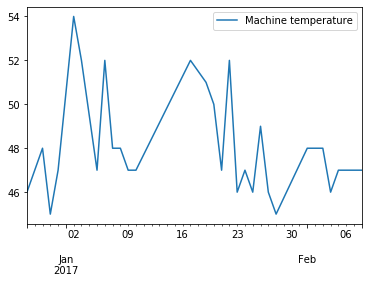

In [44]:
data_linear.plot();

terlihat perbedaan pola antara *nearest* dan *linear* dimana pada *nearest* missing value akan diisi dengan value terdekat sedangkan *linear* akan langsung ditarik garis lurus ke value berikutnya

### Correlation

kita sudah tau bahwa korelasi terbagi menjadi dua yaitu pearson dan spearman. Dalam data preprocessing, korelasi digunakan untuk mendapatkan fitur-fitur terbaik.

Kita gunakan kembali data Titanics

In [45]:
df.corr() #pearson

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

kita gunakan sebuah visualisasi agar lebih enak dipandang

In [46]:
import seaborn as sns

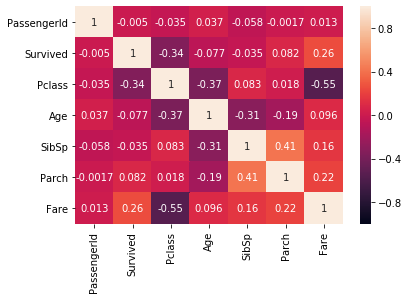

In [47]:
y_feat = df.corr()
sns.heatmap(y_feat, vmin = -1, vmax = 1, xticklabels = y_feat.columns, yticklabels = y_feat.columns, annot=True);

bagaimana cara pemilihan korelasi yang baik berdasarkan data yang kita miliki?

Dari gambar diatas nilai yang paling baik misalnya korelasi antara **Survived** (sebagai target) dengan **Pclass** dengan korelasi -0.34 yang artinya semakin kecil nilai **Pclass** maka nilai **Survived** akan semakin besar (bertolak belakang karena korelasi negatif). Oleh karena itu, **Pclass** sangat berpengaruh untuk **Survived**. Nah, korelasi disini dapat digunakan sebagai *feature selection* salah satunya seperti **Pclass**.

Bisa diperhatikan kembali untuk nilai feature yang memiliki korelasi yang tinggi yang disebut *multikolinearitas*. Seperti, **SibSp** dengan **Parch** mempunyai korelasi sebesar 0.41, nilai tersebut cukup besar oleh karena itu terdapatnya multikolenieritas. Oleh karena itu salah satunya dapat dihapus dengan melihat korelasi dengan target (**Survived**), maka korelasi yang paling kecil yaitu **SibSp** dapat dihapus.

### Numerical Data Normalization

Numerical Data Normalization merupakan proses normalisasi data dengan bentuk numerik. Data berbentuk numerik sebelumnya harus kita pilih terlebih dahulu. Perlu diperhatikan data numerik dengan data kategorik, karena keduanya mempunyai metode normalisasi yang berbeda.

Ada dua jenis :
- MinMax Scaler
- Standar Scaler

**MinMax Scaler**

MinMax Scaler pada dasarnya adalah mengambil nilai/value lalu dinormalisasi supaya mendapatkan output antara 0 hingga 1.
*contoh :*
    
    data-raw = [0,1000,2000,3000,4000]
    data_norm = [0,0.25,0.5,0.75,1]

kita gunakan kembali data Titanics

In [48]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

data mana sajakah yang harus kita normalisasi dengan Min-Max Scaler? kita lihat jenis datanya.

- PassangerId? tidak usah karena itu adalah index yang selalu unik (bahkan bisa didrop saja)
- Survived? tidak perlu karena Survived adalah kategorikal
- Name? apalgi ini mah
- Sex? gausah
- Age? ya, karena ini numerik/kontinu
- SibSp? ya ini juga numerik
- Ticket? gak
- Fare? yoi
- Cabin? gak
- Embarked? nope

nah untuk melakukan Min-Max Scaler dan Standar Scaler kita gunakan package sklearn

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
#define fungsi MinMaxScaler

scaler1 = MinMaxScaler()

kita ambil data numerikal dari data Titanics

In [51]:
data_num = df[['Age','SibSp','Parch','Fare']]

selanjutnya kita gunakan fitting dan transform. Fitting dan transform digunakan jika kita ingin mengubah nilai asli ke dalam bentuk normalisasi

In [52]:
data_m = scaler1.fit_transform(data_num)

In [53]:
data_m

array([[0.27117366, 0.125     , 0.        , 0.01415106],
       [0.4722292 , 0.125     , 0.        , 0.13913574],
       [0.32143755, 0.        , 0.        , 0.01546857],
       ...,
       [       nan, 0.125     , 0.33333333, 0.04577135],
       [0.32143755, 0.        , 0.        , 0.0585561 ],
       [0.39683338, 0.        , 0.        , 0.01512699]])

bentuknya jadi array, sekarang kita buat agar datanya lebih terlihat dengan dataframe

In [54]:
data_m = pd.DataFrame(data_m, columns=['Age','SibSp','Parch','Fare'])
data_m.head()

Age  SibSp  Parch      Fare
0  0.271174  0.125    0.0  0.014151
1  0.472229  0.125    0.0  0.139136
2  0.321438  0.000    0.0  0.015469
3  0.434531  0.125    0.0  0.103644
4  0.434531  0.000    0.0  0.015713

sip gan sekarang datanya udah dinormalisasi menggunakan Min-Max Scaler.

**Standar Scaler**

Standar Scaler merupakan data akan di normalisasi dengan menggunakan distribusi normal dan Z-Score (*ingat basic course*). Biasanya data normalisasi standar scaler yaitu -2 sampai 2.

Contoh :

    data_raw  = [0,1000,2000,3000,4000]

    data_norm = [-1.27,-0.63,0,0.63,1.27]

Perbedaan lainnya dengan Min-Max Scaler adalah persebaran data dengan Min-Max Scaler lebih kecil atau lebih rapat

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
#define fungsi StandardScaler

scaler2 = StandardScaler()

In [57]:
data_num

Age  SibSp  Parch      Fare
0    22.0      1      0    7.2500
1    38.0      1      0   71.2833
2    26.0      0      0    7.9250
3    35.0      1      0   53.1000
4    35.0      0      0    8.0500
5     NaN      0      0    8.4583
6    54.0      0      0   51.8625
7     2.0      3      1   21.0750
8    27.0      0      2   11.1333
9    14.0      1      0   30.0708
10    4.0      1      1   16.7000
11   58.0      0      0   26.5500
12   20.0      0      0    8.0500
13   39.0      1      5   31.2750
14   14.0      0      0    7.8542
15   55.0      0      0   16.0000
16    2.0      4      1   29.1250
17    NaN      0      0   13.0000
18   31.0      1      0   18.0000
19    NaN      0      0    7.2250
20   35.0      0      0   26.0000
21   34.0      0      0   13.0000
22   15.0      0      0    8.0292
23   28.0      0      0   35.5000
24    8.0      3      1   21.0750
25   38.0      1      5   31.3875
26    NaN      0      0    7.2250
27   19.0      3      2  263.0000
28    NaN      0      0    7.8792
29    NaN      0      0    7.8958
..    ...    ...    ...       ...
861  21.0      1      0   11.5000
862  48.0      0      0   25.9292
863   NaN      8      2   69.5500
864  24.0      0      0   13.0000
865  42.0      0      0   13.0000
866  27.0      1      0   13.8583
867  31.0      0      0   50.4958
868   NaN      0      0    9.5000
869   4.0      1      1   11.1333
870  26.0      0      0    7.8958
871  47.0      1      1   52.5542
872  33.0      0      0    5.0000
873  47.0      0      0    9.0000
874  28.0      1      0   24.0000
875  15.0      0      0    7.2250
876  20.0      0      0    9.8458
877  19.0      0      0    7.8958
878   NaN      0      0    7.8958
879  56.0      0      1   83.1583
880  25.0      0      1   26.0000
881  33.0      0      0    7.8958
882  22.0      0      0   10.5167
883  28.0      0      0   10.5000
884  25.0      0      0    7.0500
885  39.0      0      5   29.1250
886  27.0      0      0   13.0000
887  19.0      0      0   30.0000
888   NaN      1      2   23.4500
889  26.0      0      0   30.0000
890  32.0      0      0    7.7500

[891 rows x 4 columns]

In [58]:
data_s = scaler2.fit_transform(data_num)
data_s

array([[-0.53037664,  0.43279337, -0.47367361, -0.50244517],
       [ 0.57183099,  0.43279337, -0.47367361,  0.78684529],
       [-0.25482473, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [        nan,  0.43279337,  2.00893337, -0.17626324],
       [-0.25482473, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.15850313, -0.4745452 , -0.47367361, -0.49237783]])

In [59]:
data_s = pd.DataFrame(data_s, columns=['Age','SibSp','Parch','Fare'])
data_s.head()

Age     SibSp     Parch      Fare
0 -0.530377  0.432793 -0.473674 -0.502445
1  0.571831  0.432793 -0.473674  0.786845
2 -0.254825 -0.474545 -0.473674 -0.488854
3  0.365167  0.432793 -0.473674  0.420730
4  0.365167 -0.474545 -0.473674 -0.486337

Hasilnya cukup berbeda dengan Min-Max Scaler.

Kapan menggunakan Min-Max dan kapan menggunakan Standard?

Sebenernya itu terserah kita mau menggunakan apa, tetapi biasanya Min-Max Scaler digunakan untuk data yang persebarannya tidak terlalu besar dan untuk data yang memiliki outlier yang cukup signifikan

### Categorical Data Normalization

secara general ada dua cara untuk menormalisasi data kategorikal. Ada **Label Encoder** dan **One Hot Encoder**.

**Label Encoder** mengambil value kategorikal dan mengubahnya menjadi label seperti 0,1,2,dll. Terkadang bagaimana data tersebut menjadi 0,1,2 adalah random.

Contoh :
    data_raw = [low, low, medium, high, medium, low, high, medium]
    data_norm = [0, 0, 1, 2, 1, 0, 2, 1]

Kita akan gunakan kembali data Titanics

In [60]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

yang termasuk data kategorikal adalah **Pclass**, **Sex**, **Embarked**.

sekarang kita pisahkan dulu data kategorikal ke variabel lain

In [61]:
data_cat = df[['Pclass','Sex','Embarked']]
data_cat.head()

Pclass     Sex Embarked
0       3    male        S
1       1  female        C
2       3  female        S
3       1  female        S
4       3    male        S

#### Label Encoder

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
#define function

encoder1 = LabelEncoder()

In [64]:
data_2 = data_cat.copy()

In [65]:
encoder1.fit(data_2)

ValueError: bad input shape (891, 3)

oops error :(

kita tidak bisa langsung menggunakan tabel tapi harus satu-satu kolomnya

In [66]:
encoder1.fit(data_2['Sex']) #encoder1.fit(data_2.iloc[:,1])

LabelEncoder()

In [67]:
encoder1.classes_

array(['female', 'male'], dtype=object)

setelah kita mendapatkan classesnya sekarang kita akan melakukan transform

In [68]:
a = encoder1.transform(data_2['Sex'])

In [69]:
a

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [70]:
a = pd.DataFrame(a)
a.head()

0
0  1
1  0
2  0
3  0
4  1

Sekarang kita gabungkan ke tabel data_2

In [71]:
data_2.join(a).head()

Pclass     Sex Embarked  0
0       3    male        S  1
1       1  female        C  0
2       3  female        S  0
3       1  female        S  0
4       3    male        S  1

In [72]:
data_2.head()

Pclass     Sex Embarked
0       3    male        S
1       1  female        C
2       3  female        S
3       1  female        S
4       3    male        S

dari hasil encoder1.classes_ kita tahu bahwa bentuknya adalah ('female','male') artinya 'female' diubah jadi 0 dan 'male' diubah jadi 1.

Sekarang biar gak ribet masa iya satu kolom satu kolom, jadi kita pake looping

In [73]:
data_2 = data_2.fillna({'Embarked':'S'}) #tidak boleh ada data kosong
length = data_2.shape[1] #mengambil jumlah kolom
col = data_2.columns
for i in range (length):
    print(i)
    a = encoder1.fit_transform(data_2.iloc[:,i:i+1])
    a = pd.DataFrame(a, columns=[col[i]+'new'])
    data_2 = data_2.join(a)

0
1
2


C:\Users\Rahmat Hendrawan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
data_2.head()

Pclass     Sex Embarked  Pclassnew  Sexnew  Embarkednew
0       3    male        S          2       1            2
1       1  female        C          0       0            0
2       3  female        S          2       0            2
3       1  female        S          0       0            2
4       3    male        S          2       1            2

data pada tabel diatas merupakan data asli dari Pclass, Sex dan Embarked kemudian disusul oleh data baru yang telah dinormalisasi dari setiap kolom dari data asli tersebut yaitu dengan nama Pclassnew, Sexnew dan Embarkednew.

#### One Hot Encoder

**one hot encoder** mengubah nilai kategorikal menjadi hanya 0 dan 1, tetapi **one hot encoder** membuat data lebih banyak.

contoh :
    - data_raw = ['Belgia','France','France','Jerman','Belgia']
    - data_norm = [[1,0,0],[0,1,0],[0,1,0],[0,0,1],[1,0,0]]

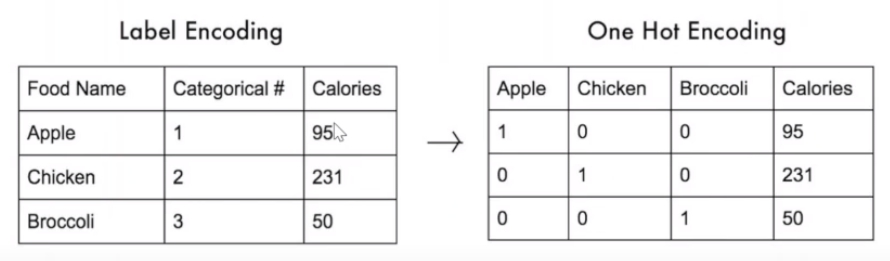

untuk menggunakannya, pertama kita import librarynya dulu

In [75]:
from sklearn.preprocessing import OneHotEncoder

In [76]:
encoder2 = OneHotEncoder()

siapkan datanya

In [78]:
data_3 = data_cat.copy()

In [79]:
data_3.head()

Pclass     Sex Embarked
0       3    male        S
1       1  female        C
2       3  female        S
3       1  female        S
4       3    male        S

pastikan tidak ada missing value

In [83]:
data_3 = data_3.fillna({'Embarked':'S'})

sekarang kita gunakan encodernya

In [86]:
data_ohe = encoder2.fit_transform(data_3)
data_ohe

<891x8 sparse matrix of type '<class 'numpy.float64'>'
	with 2673 stored elements in Compressed Sparse Row format>

oops, apa tuch?

nah biar gak kayak gitu kasih fungsi toarray()

In [91]:
data_ohe = encoder2.fit_transform(data_3).toarray()
data_ohe

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [92]:
data_ohe1 = pd.DataFrame(data_ohe)
data_ohe1.head()

0    1    2    3    4    5    6    7
0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0
1  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0
2  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0
3  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0
4  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0

maksud tabel di atas adalah :
    - 3 kolom pertama adalah untuk PClass (PClass memiliki 3 jenis value)
    - 2 kolom berikutnya untuk Sex (Sex memiliki 2 jenis value)
    - 3 kolom berikutnya lagi untuk Embarked (Embarked memiliki 3 jenis value)

Supaya gampang ngeliatnya, lakukan saja seperti ini

In [93]:
data_ohe2 = pd.DataFrame(data_ohe)
data_ohe2 = pd.DataFrame(data_ohe, columns=['Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S'])
data_ohe2.head()

Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0       0.0       0.0       1.0         0.0       1.0         0.0         0.0   
1       1.0       0.0       0.0         1.0       0.0         1.0         0.0   
2       0.0       0.0       1.0         1.0       0.0         0.0         0.0   
3       1.0       0.0       0.0         1.0       0.0         0.0         0.0   
4       0.0       0.0       1.0         0.0       1.0         0.0         0.0   

   Embarked_S  
0         1.0  
1         0.0  
2         1.0  
3         1.0  
4         1.0

### Data Finalization

kita sudah melakukan normalisasi pada data, sekarang kita gabungkan data data tersebut.

kita akan mencoba menggabungkan data minmax scaler dan data one hot encoder

In [95]:
data_ohe2.head()

Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0       0.0       0.0       1.0         0.0       1.0         0.0         0.0   
1       1.0       0.0       0.0         1.0       0.0         1.0         0.0   
2       0.0       0.0       1.0         1.0       0.0         0.0         0.0   
3       1.0       0.0       0.0         1.0       0.0         0.0         0.0   
4       0.0       0.0       1.0         0.0       1.0         0.0         0.0   

   Embarked_S  
0         1.0  
1         0.0  
2         1.0  
3         1.0  
4         1.0

In [100]:
data_m.head()

Age  SibSp  Parch      Fare
0  0.271174  0.125    0.0  0.014151
1  0.472229  0.125    0.0  0.139136
2  0.321438  0.000    0.0  0.015469
3  0.434531  0.125    0.0  0.103644
4  0.434531  0.000    0.0  0.015713

sekarang kita gabungkan

In [97]:
data_fix = data_m.join(data_ohe2)

In [99]:
data_fix.head()

Age  SibSp  Parch      Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  \
0  0.271174  0.125    0.0  0.014151       0.0       0.0       1.0         0.0   
1  0.472229  0.125    0.0  0.139136       1.0       0.0       0.0         1.0   
2  0.321438  0.000    0.0  0.015469       0.0       0.0       1.0         1.0   
3  0.434531  0.125    0.0  0.103644       1.0       0.0       0.0         1.0   
4  0.434531  0.000    0.0  0.015713       0.0       0.0       1.0         0.0   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0       1.0         0.0         0.0         1.0  
1       0.0         1.0         0.0         0.0  
2       0.0         0.0         0.0         1.0  
3       0.0         0.0         0.0         1.0  
4       1.0         0.0         0.0         1.0

sekarang semuanya sudah terkumpul, tapi coba kita cek apakah semua kolom sudah terkumpul atau belum

In [101]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

**PassengerId**, **Survived**, **Name**, **Ticket**, **Cabin** tidak ada. Dari kolom tersebut manakah yang penting untuk dimasukkan?

Yang penting untuk dimasukkan adalah **Survived** karena itulah yang akan menjadi target kita, sedangkan data lainnya bersifat unik dan tidak terlalu penting untuk dimasukkan maka tidak perlu untuk dimasukkan.

In [102]:
data_fix = data_fix.join(df['Survived'])

In [103]:
data_fix

Age  SibSp     Parch      Fare  Pclass_1  Pclass_2  Pclass_3  \
0    0.271174  0.125  0.000000  0.014151       0.0       0.0       1.0   
1    0.472229  0.125  0.000000  0.139136       1.0       0.0       0.0   
2    0.321438  0.000  0.000000  0.015469       0.0       0.0       1.0   
3    0.434531  0.125  0.000000  0.103644       1.0       0.0       0.0   
4    0.434531  0.000  0.000000  0.015713       0.0       0.0       1.0   
5         NaN  0.000  0.000000  0.016510       0.0       0.0       1.0   
6    0.673285  0.000  0.000000  0.101229       1.0       0.0       0.0   
7    0.019854  0.375  0.166667  0.041136       0.0       0.0       1.0   
8    0.334004  0.000  0.333333  0.021731       0.0       0.0       1.0   
9    0.170646  0.125  0.000000  0.058694       0.0       1.0       0.0   
10   0.044986  0.125  0.166667  0.032596       0.0       0.0       1.0   
11   0.723549  0.000  0.000000  0.051822       1.0       0.0       0.0   
12   0.246042  0.000  0.000000  0.015713       0.0       0.0       1.0   
13   0.484795  0.125  0.833333  0.061045       0.0       0.0       1.0   
14   0.170646  0.000  0.000000  0.015330       0.0       0.0       1.0   
15   0.685851  0.000  0.000000  0.031230       0.0       1.0       0.0   
16   0.019854  0.500  0.166667  0.056848       0.0       0.0       1.0   
17        NaN  0.000  0.000000  0.025374       0.0       1.0       0.0   
18   0.384267  0.125  0.000000  0.035134       0.0       0.0       1.0   
19        NaN  0.000  0.000000  0.014102       0.0       0.0       1.0   
20   0.434531  0.000  0.000000  0.050749       0.0       1.0       0.0   
21   0.421965  0.000  0.000000  0.025374       0.0       1.0       0.0   
22   0.183212  0.000  0.000000  0.015672       0.0       0.0       1.0   
23   0.346569  0.000  0.000000  0.069291       1.0       0.0       0.0   
24   0.095250  0.375  0.166667  0.041136       0.0       0.0       1.0   
25   0.472229  0.125  0.833333  0.061264       0.0       0.0       1.0   
26        NaN  0.000  0.000000  0.014102       0.0       0.0       1.0   
27   0.233476  0.375  0.333333  0.513342       1.0       0.0       0.0   
28        NaN  0.000  0.000000  0.015379       0.0       0.0       1.0   
29        NaN  0.000  0.000000  0.015412       0.0       0.0       1.0   
..        ...    ...       ...       ...       ...       ...       ...   
861  0.258608  0.125  0.000000  0.022447       0.0       1.0       0.0   
862  0.597889  0.000  0.000000  0.050610       1.0       0.0       0.0   
863       NaN  1.000  0.333333  0.135753       0.0       0.0       1.0   
864  0.296306  0.000  0.000000  0.025374       0.0       1.0       0.0   
865  0.522493  0.000  0.000000  0.025374       0.0       1.0       0.0   
866  0.334004  0.125  0.000000  0.027050       0.0       1.0       0.0   
867  0.384267  0.000  0.000000  0.098561       1.0       0.0       0.0   
868       NaN  0.000  0.000000  0.018543       0.0       0.0       1.0   
869  0.044986  0.125  0.166667  0.021731       0.0       0.0       1.0   
870  0.321438  0.000  0.000000  0.015412       0.0       0.0       1.0   
871  0.585323  0.125  0.166667  0.102579       1.0       0.0       0.0   
872  0.409399  0.000  0.000000  0.009759       1.0       0.0       0.0   
873  0.585323  0.000  0.000000  0.017567       0.0       0.0       1.0   
874  0.346569  0.125  0.000000  0.046845       0.0       1.0       0.0   
875  0.183212  0.000  0.000000  0.014102       0.0       0.0       1.0   
876  0.246042  0.000  0.000000  0.019218       0.0       0.0       1.0   
877  0.233476  0.000  0.000000  0.015412       0.0       0.0       1.0   
878       NaN  0.000  0.000000  0.015412       0.0       0.0       1.0   
879  0.698417  0.000  0.166667  0.162314       1.0       0.0       0.0   
880  0.308872  0.000  0.166667  0.050749       0.0       1.0       0.0   
881  0.409399  0.000  0.000000  0.015412       0.0       0.0       1.0   
882  0.271174  0.000  0.000000  0.020527       0.0       0.0       1.0   
883  0.346569 

sip sekarang udah semua, nah kalau kita lihat di kolom **Age** masih ada data NaN, sebenernya sih harusnya di ilangin dulu tapi karena ini cuma contoh jadi belum diilangin.

**JANGAN LUPA HILANGKAN SEMUA MISSING VALUE**

oke biar enak kita isi dulu aja pake median

In [104]:
data_fix = data_fix.fillna({'Age':data_fix['Age'].median()})
data_fix

Age  SibSp     Parch      Fare  Pclass_1  Pclass_2  Pclass_3  \
0    0.271174  0.125  0.000000  0.014151       0.0       0.0       1.0   
1    0.472229  0.125  0.000000  0.139136       1.0       0.0       0.0   
2    0.321438  0.000  0.000000  0.015469       0.0       0.0       1.0   
3    0.434531  0.125  0.000000  0.103644       1.0       0.0       0.0   
4    0.434531  0.000  0.000000  0.015713       0.0       0.0       1.0   
5    0.346569  0.000  0.000000  0.016510       0.0       0.0       1.0   
6    0.673285  0.000  0.000000  0.101229       1.0       0.0       0.0   
7    0.019854  0.375  0.166667  0.041136       0.0       0.0       1.0   
8    0.334004  0.000  0.333333  0.021731       0.0       0.0       1.0   
9    0.170646  0.125  0.000000  0.058694       0.0       1.0       0.0   
10   0.044986  0.125  0.166667  0.032596       0.0       0.0       1.0   
11   0.723549  0.000  0.000000  0.051822       1.0       0.0       0.0   
12   0.246042  0.000  0.000000  0.015713       0.0       0.0       1.0   
13   0.484795  0.125  0.833333  0.061045       0.0       0.0       1.0   
14   0.170646  0.000  0.000000  0.015330       0.0       0.0       1.0   
15   0.685851  0.000  0.000000  0.031230       0.0       1.0       0.0   
16   0.019854  0.500  0.166667  0.056848       0.0       0.0       1.0   
17   0.346569  0.000  0.000000  0.025374       0.0       1.0       0.0   
18   0.384267  0.125  0.000000  0.035134       0.0       0.0       1.0   
19   0.346569  0.000  0.000000  0.014102       0.0       0.0       1.0   
20   0.434531  0.000  0.000000  0.050749       0.0       1.0       0.0   
21   0.421965  0.000  0.000000  0.025374       0.0       1.0       0.0   
22   0.183212  0.000  0.000000  0.015672       0.0       0.0       1.0   
23   0.346569  0.000  0.000000  0.069291       1.0       0.0       0.0   
24   0.095250  0.375  0.166667  0.041136       0.0       0.0       1.0   
25   0.472229  0.125  0.833333  0.061264       0.0       0.0       1.0   
26   0.346569  0.000  0.000000  0.014102       0.0       0.0       1.0   
27   0.233476  0.375  0.333333  0.513342       1.0       0.0       0.0   
28   0.346569  0.000  0.000000  0.015379       0.0       0.0       1.0   
29   0.346569  0.000  0.000000  0.015412       0.0       0.0       1.0   
..        ...    ...       ...       ...       ...       ...       ...   
861  0.258608  0.125  0.000000  0.022447       0.0       1.0       0.0   
862  0.597889  0.000  0.000000  0.050610       1.0       0.0       0.0   
863  0.346569  1.000  0.333333  0.135753       0.0       0.0       1.0   
864  0.296306  0.000  0.000000  0.025374       0.0       1.0       0.0   
865  0.522493  0.000  0.000000  0.025374       0.0       1.0       0.0   
866  0.334004  0.125  0.000000  0.027050       0.0       1.0       0.0   
867  0.384267  0.000  0.000000  0.098561       1.0       0.0       0.0   
868  0.346569  0.000  0.000000  0.018543       0.0       0.0       1.0   
869  0.044986  0.125  0.166667  0.021731       0.0       0.0       1.0   
870  0.321438  0.000  0.000000  0.015412       0.0       0.0       1.0   
871  0.585323  0.125  0.166667  0.102579       1.0       0.0       0.0   
872  0.409399  0.000  0.000000  0.009759       1.0       0.0       0.0   
873  0.585323  0.000  0.000000  0.017567       0.0       0.0       1.0   
874  0.346569  0.125  0.000000  0.046845       0.0       1.0       0.0   
875  0.183212  0.000  0.000000  0.014102       0.0       0.0       1.0   
876  0.246042  0.000  0.000000  0.019218       0.0       0.0       1.0   
877  0.233476  0.000  0.000000  0.015412       0.0       0.0       1.0   
878  0.346569  0.000  0.000000  0.015412       0.0       0.0       1.0   
879  0.698417  0.000  0.166667  0.162314       1.0       0.0       0.0   
880  0.308872  0.000  0.166667  0.050749       0.0       1.0       0.0   
881  0.409399  0.000  0.000000  0.015412       0.0       0.0       1.0   
882  0.271174  0.000  0.000000  0.020527       0.0       0.0       1.0   
883  0.346569 

### Split Training and Testing Data

Sebelum kita masuk ke Mechine Learning, kita harus membagi data training dan data testing. Untuk itu, kita perlu import pacakge berikut

In [105]:
from sklearn.model_selection import train_test_split

Setelah itu buat dua variabel, misal **x** dan **y**, dimana **x** adalah fiturnya dan **y** adalah labelnya

In [108]:
x = data_fix.drop(['Survived'], axis=1)
y = data_fix['Survived']

Selanjutnya adalah kita lakukan pembagian train dan test nya

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

dalam parameter fungsi train_test_split ada **x** dan **y** yaitu data yang sudah kita bagi sebelumnya. **test_size** adalah jumlah data test nya, pada code tersebut adalah 0.2 artinya kita mengambil 20% data untuk menjadi data test. **random_state** adalah bagaimana data tersebut displit, yang penting ada angkanya jangan 0

coba kita cek shape dari data training dan testingnya

In [111]:
x_train.shape

(712, 12)

In [112]:
x_test.shape

(179, 12)

### Save Data

supaya data yang sudah kita preprocessing bisa digunakan lagi tanpa harus preprocessing ulang alangkah baiknya jika kita simpan ke dalam csv

In [113]:
data_fix.to_csv('data_preprossing.csv', index = False)

index = false artinya index yang ada di panda tidak ikut dimasukkan ke dalam kolom di csv